In [222]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen import Lattice
from matplotlib import pyplot 
import numpy as np
from pymatgen.electronic_structure.bandstructure import BandStructure as bs
from IPython.display import Markdown,display,Image
from pymatgen.electronic_structure.plotter import BSPlotter as bsp
from scipy import constants

with MPRester("BmFlV0IoLySTXxcf") as m:
    
    #télécharger la structure de bande
    bands = m.get_bandstructure_by_material_id("mp-672285")
    
    #obtenir le gap
    gap = bs.get_band_gap(bands)
    e = bands.efermi
    f = gap.get("energy")  
    
    #obtenir structure de bandes
    valence = bands.get_vbm()
    conduction = bands.get_cbm()

    #obtenir le graphique
    a = bsp(bands)
    
    #obtenir les données
    b = a.bs_plot_data()
    
    #obtention des energies des bandes de conduction et de valence
    venergy0 = np.zeros(9) #energies de début d'intervalles 'k' pour la bande de valence
    venergy1 = np.zeros(9) #energies de fin d'intervalles 'k' pour la bande de valence
    for i in range(0,9):
        venergy0[i] = b.get("energy")[i].get("1")[15][0]
        venergy1[i] = b.get("energy")[i].get("1")[15][-1]
        i = i+1
    
    cenergy0 = np.zeros(9) #energies de début d'intervalles 'k' pour la bande de conduction
    cenergy1 = np.zeros(9) #energies de fin d'intervalles 'k' pour la bande de conduction
    for j in range(0,9):
        cenergy0[j] = b.get("energy")[j].get("1")[16][0]
        cenergy1[j] = b.get("energy")[j].get("1")[16][-1]
        j = j+1
    
    #obtention des distances k
    c = a.get_ticks()
    
    distance0 = np.zeros(9) #vecteur qui stocke les données d'entrée de la distance k
    distance1 = np.zeros(9) #vecteur qui stocke les données de sortie de la distance k
    d = len(c.get("distance"))
    l = 0
    m = 0
    
    for k in range(0,d-1):
        if c.get("distance")[k] != c.get("distance")[k-1]:
            distance0[l] = c.get("distance")[k]
            l = l+1
        if c.get("distance")[k] != c.get("distance")[k+1]:
            distance1[m] = c.get("distance")[k+1]
            m = m+1
    
    cbp = (cenergy1-cenergy0)/(distance1-distance0) #calcul des pentes de la bande de conduction
    vbp = (venergy1-venergy0)/(distance1-distance0) #calcul des pentes de la bande de valence
    
    #trouver les pentes minimum et maximum sur les bandes
    mincbp = min(abs(cbp))
    minvbp = min(abs(vbp))
    maxcbp = max(abs(cbp))
    maxvbp = max(abs(vbp))
    
    print(vbp)
    print(minvbp)
    print(maxvbp)

[-0.67781223  0.03506721  1.21556617 -1.01815647 -0.54258284  0.9556103
 -0.79193026  1.02379964  0.89839065]
0.03506721397860847
1.2155661658248604


In [126]:
print("On détermine la bande interdite :")
print(gap)
print("On voit que la bande interdite est indirecte, se trouve en Z-Gamma et possède une énergie de 2.2647eV.")
print("Cette dernière débute à l'énergie de Fermi (bande de valence) :")
print(e)
print("et finit en :")
print(e+f)

On détermine la bande interdite :
{'direct': False, 'energy': 2.2647, 'transition': 'Z-\\Gamma'}
On voit que la bande interdite est indirecte, se trouve en Z-Gamma et possède une énergie de 2.2647eV.
Cette dernière débute à l'énergie de Fermi (bande de valence) :
2.44947986
et finit en :
4.71417986


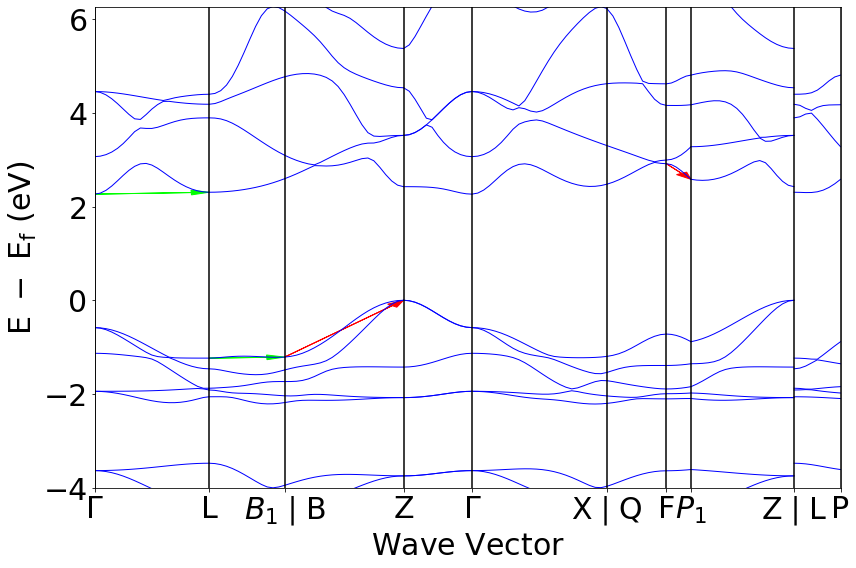

In [179]:
a.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
g = distance1-distance0
h = cenergy1-cenergy0
o = venergy1-venergy0
#flèches de la bande de conduction
pyplot.arrow(distance0[0],cenergy0[0],g[0],h[0],length_includes_head=True,head_width=0.1,color=(0,1,0,1))
pyplot.arrow(distance0[6],cenergy0[6],g[6],h[6],length_includes_head=True,head_width=0.1,color=(1,0,0,1))
#flèches de la bande de valence
pyplot.arrow(distance0[1],venergy0[1],g[1],o[1],length_includes_head=True,head_width=0.1,color=(0,1,0,1))
pyplot.arrow(distance0[2],venergy0[2],g[2],o[2],length_includes_head=True,head_width=0.1,color=(1,0,0,1))

In [162]:
print("Dispersion les plus faibles et plus fortes de la bande de valence :")
print(minvbp,maxvbp)
print("On constate que ces dispersion se situent entre L et B_1|B et entre B_1|B et Z respectivement.")
print("La flèche verte correspond à la pente la plus faible tandis que la flèche rouge corresponde à la plus forte pente.")

Dispersion les plus faibles et plus fortes de la bande de valence :
0.03506721397860847 1.2155661658248604
On constate que ces dispersion se situent entre L et B_1|B et entre B_1|B et Z respectivement.


In [163]:
print("Dispersion les plus faibles et plus fortes de la bande de conduction :")
print(mincbp,maxcbp)
print("On constate que ces dispersion se situent entre gamma et L et entre F et P_1 respectivement.")
print("La flèche verte correspond à la pente la plus faible tandis que la flèche rouge corresponde à la plus forte pente.")

Dispersion les plus faibles et plus fortes de la bande de conduction :
0.041849257552214976 1.613927676783568
On constate que ces dispersion se situent entre gamma et L et entre F et P_1 respectivement.


In [180]:
print("On va maintenant chercher à calculer la masse effective.")
print("Pour ce faire, on va procèder par étapes :")
print("1) On va prendre le min/max de la bande de conduction/valence")
print("2) On va prendre un deuxième point proche afin de pouvoir approximer la courbe par une parabole.")
print("3) Grâce à l'équation de la parabole, on pourra calculer la masse effective au moyen de la formule :")

On va maintenant chercher à calculer la masse effective.
Pour ce faire, on va procèder par étapes :
1) On va prendre le min/max de la bande de conduction/valence
2) On va prendre un deuxième point proche afin de pouvoir approximer la courbe par une parabole.
3) Grâce à l'équation de la parabole, on pourra calculer la masse effective au moyen de la formule :


![](masse.PNG)

In [229]:
print("On commence par la bande de conduction")
#on prend les ordonnées
yc = cenergy0[4]
y2c = b.get("energy")[4].get("1")[16][4]
#on prend les abcisses
xc = distance0[4]
x2c = distance0[4]+(5/24)*(distance1[4]-distance0[4])
#on cherche la parabole passant par ces points
ac = (y2c-yc)/(x2c-xc)**2
bc = -2*xc*ac
cc = yc+ac*xc*xc

print("a :",ac,"b :",bc,"c :",cc)

On commence par la bande de conduction
a : 5.311287784555141 b : -33.6133441951626 c : 55.44657197782885


vérification de la parabole sur le graphique
La parabole colle plus ou moins bien donc c'est une bonne approximation


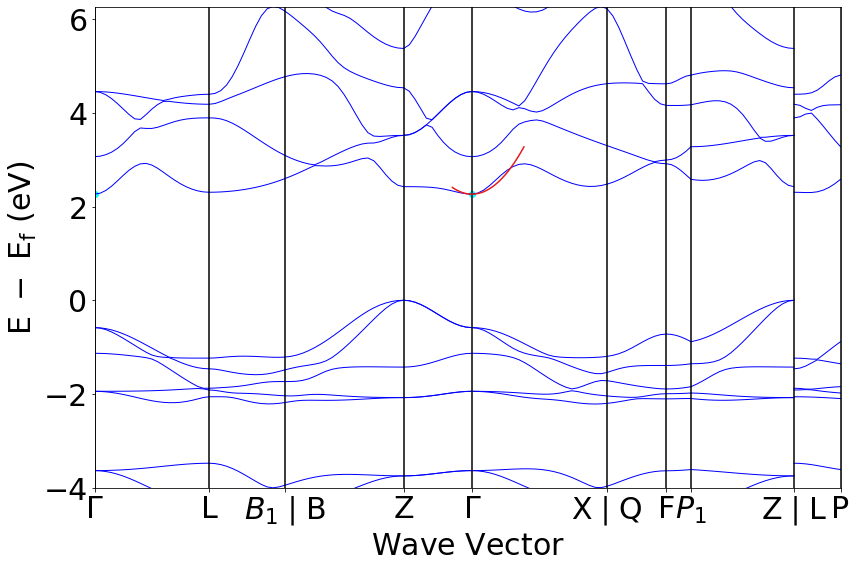

In [252]:
print("vérification de la parabole sur le graphique")
polynomc = np.polynomial.polynomial.Polynomial([cc,bc,ac])
cabcisses = np.linspace(3,3.6,100)
cordonnees = np.zeros(100)
for p in range (0,100):
    cordonnees[p] = polynomc(cabcisses[p])
#on vérifie sur le graphe
a.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
pyplot.plot(cabcisses,cordonnees)
pyplot.scatter(distance0[0],cenergy0[0],c='cyan')
pyplot.scatter(xc,yc,c='cyan')
pyplot.show
print("La parabole colle plus ou moins bien donc c'est une bonne approximation")
print("Les minimum sont mis en cyan, il y en a deux.")

In [240]:
print("La dérivée seconde du polynôme est donnée par :",2*ac)
hbar = constants.hbar
mec = (hbar**2)/((2*ac*1.60218*10**-19)*(10**-10)**2) #il faut convertir les eV en Joules et les angstrom en metres
print("La masse effective de la bande de conduction est :",mec)

La dérivée seconde du polynôme est donnée par : 10.622575569110282
La masse effective de la bande de conduction est : 6.534482311086838e-31


In [233]:
print("On fait la même chose pour la bade de valence")
#on prend les ordonnées
yv = venergy0[3]
y2v = b.get("energy")[2].get("1")[15][13]
#on prend les abcisses
xv = distance0[3]
x2v = distance0[2]+(14/21)*(distance1[2]-distance0[2])
#on cherche la parabole passant par ces points
av = (y2v-yv)/(x2v-xv)**2
bv = -2*xv*av
cv = yv+av*xv*xv
print(xv,x2v)
print("a :",av,"b :",bv,"c :",cv)

On fait la même chose pour la bade de valence
2.591138067471876 2.2586455400968592
a : -2.8104604294352296 b : 14.564582011665959 c : -18.86942144362189


vérification de la parabole sur le graphique
La parabole colle plus ou moins bien donc c'est une bonne approximation


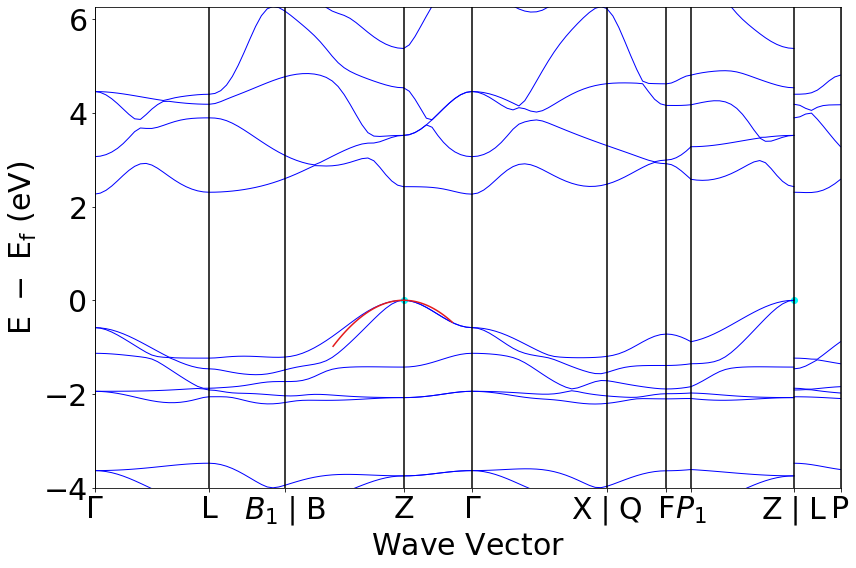

In [250]:
print("vérification de la parabole sur le graphique")
polynomv = np.polynomial.polynomial.Polynomial([cv,bv,av])
vabcisses = np.linspace(2,3,100)
vordonnees = np.zeros(100)
for p in range (0,100):
    vordonnees[p] = polynomv(vabcisses[p])
#on vérifie sur le graphe
a.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
pyplot.plot(vabcisses,vordonnees)
pyplot.scatter(xv,yv,c='cyan')
pyplot.scatter(distance0[8],venergy1[7],c='cyan')
pyplot.show
print("La parabole colle plus ou moins bien donc c'est une bonne approximation")

In [239]:
print("La dérivée seconde du polynôme est donnée par :",2*av)
mev = (hbar**2)/((2*av*1.60218*10**-19)*(10**-10)**2) #il faut convertir les eV en Joules et les angstrom en metres
print("La masse effective de la bande de conduction est :",mev)
print("Les minimum sont mis en cyan, il y en a deux.")

La dérivée seconde du polynôme est donnée par : -5.620920858870459
La masse effective de la bande de conduction est : -1.234904989722326e-30
